<font color = "Grey"> 
    <b>Alexandra Cotter (G00385851)<br> </b>
    Emerging Technologies Assesment Notebook<br>
    Topic: Computation
</font>

# <font color="Violet"> Quantum Computing </font>
****
<div class="alert alert-block alert-success">
        <b>Contents</b><br>
    
- Probability <br>
- Qubits <br>
- Qubit Gates <br>
- Quantum Gates; NOT & CNOT <br>
- Deutsch Jozsa Algorithm <br>
- Quantum Oracles
</div>

***

## <font color="violet"> What is Quantum Computing? </font><br>

Quantum Computing focuses on the development of computer technologies. It is centered upon Quantum Theory; the behaviour and nature of energy and matter on an atomic and subatomic (quantum) level. Quantum theory gives us a more complete picture of the universe. We can use unexplained behavior to perform certain computations that were previously deemed not possible.

In [64]:
# Generating random numbers.
import numpy as np

# Plotting.
import seaborn as sns

# Random numbers and choices.
import random

# Combinations and permutation.
import itertools

## <font color="MediumOrchid"> Probability Tree </font>
If you place a fair coin in the state Tails and then flip it, there is a 50% chance of seeing Tails and a 50% chance of seeing Heads. <br> Below is a plot of this on a probability tree:

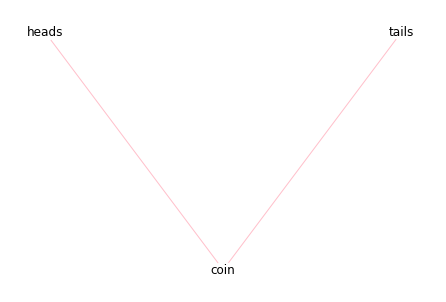

In [65]:
# Import the NetworkX package
import networkx as nx

# Import matplotlib library to visualize the graph in a Jupyter Notebook
import matplotlib.pyplot as plt


# Create a Graph() object and relate it to the variable 'graph_1'
graph_1 = nx.Graph()

graph_1.add_nodes_from(['coin','heads','tails'])

# Add the edges:
graph_1.add_edges_from([('coin', 'heads'), ('coin', 'tails')])

# Use the .draw() function to visualize the graph
nx.draw_spectral(graph_1,with_labels=True, edge_color="pink", node_color="white")


<h6> <c> <font color="MediumOrchid"> predicting the outcome of chained events leads to 50% chance of getting 'Heads' or 'Tails' </font></c></h6>

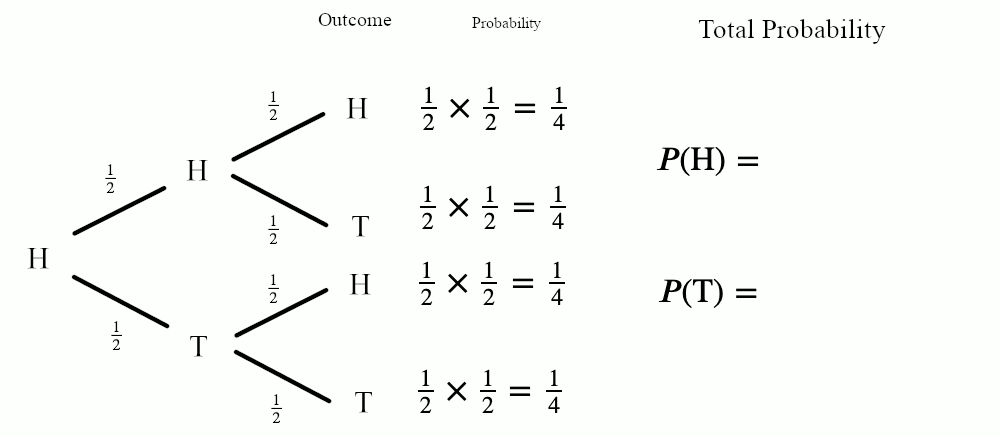

In [66]:
# Simulating flipping one coin 50 times.
np.random.binomial(1, 0.5, 50)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0])

In [67]:
# Flip coin 50  times, Counting total of tails.
np.random.binomial(50, 0.5)

32

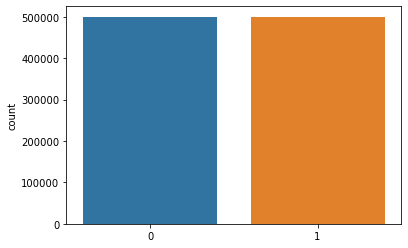

In [68]:
# Plot result. Expected result: roughly 50/50.
sns.countplot(x=np.random.binomial(1, 0.5, 1000000));

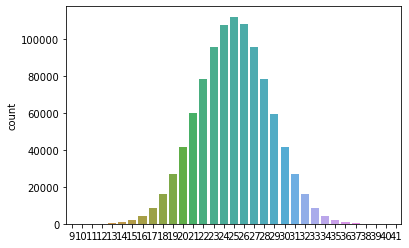

In [69]:
# Outcomes of flipping fifty coins.
sns.countplot(x=np.random.binomial(50, 0.5, 1000000));

***
## <font color="BlueViolet" >Qubits </font>
To measure probabilities, Quantum Computing uses a Qubit, which is a quantum variant of a bit. Qubit's use 0 and 1 as states and can store a single binary piece of information. They can be manipulated with quantum mechanics to give new gates, allowing new ways to design algorithms.

Unlike classical bits, Qubits are not restricted to their state. The state of a Qubit is more complex than a binary value. Getting a 0 or 1 from a Qubit only needs to be well-defined when measurements are made to extract an output.<br>
Representing Qubits with a mutually exclusive state of 0 or 1 can be done using <i> orthogonal vectors. </i> :
<br>
<font color="salmon">
<b>state 0: </b>
$|0\rangle = $ 
$\begin {bmatrix} 1 \\ 0\end{bmatrix}$
</font>
<br>
<br>
<font color="MediumVioletRed">
<b>state 1:</b>
$|1\rangle = $ 
$\begin {bmatrix} 0 \\ 1\end{bmatrix}$
</font>
<br>
These two states ($|0\rangle$  & $|1\rangle$) form an orthonormal basis. This means any 2D vector can be represented by combining them. Therefore the state of the Qubit can be written using the following notation: <br>
$|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $
<br>
$|q_0\rangle$ is the statevector of the Qubit. In the notation above, the statevector is expressed as a superposition (linear combination) of $|0\rangle and |1\rangle$

In [159]:
import qiskit
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.visualization as viz
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

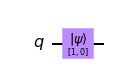

In [160]:
qc = qiskit.QuantumCircuit(1)  
qc.initial_state = [0,1] #initial_state as |1>
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

In [77]:
sim = Aer.get_backend('aer_simulator')

In [163]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
# Define initial_state as |1>
initial_state = [0,1] 
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0) 
# Tell simulator to save statevector
qc.save_statevector() 
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(qc)   
# Do the simulation and return the result
result = sim.run(qobj).result() 

In [164]:
out_state = result.get_statevector()
print(out_state) 

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


<h6> The result above is a vector with the following complex elements (python uses j for imaginary units):<br></h6>
0.+0j = 0 <br>
1.+0.j = 1

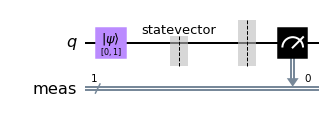

In [165]:
qc.measure_all()
qc.draw(output='mpl')

<h6> Getting the counts for 0 and 1 results using .get_counts():</h6>

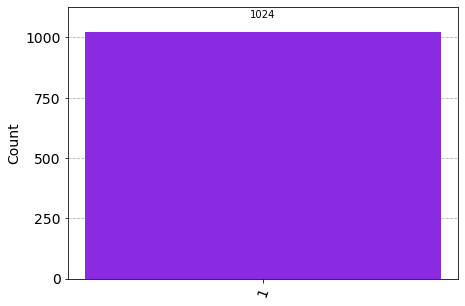

In [166]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts, color="BlueViolet")

<h6> Result</h6>
The result shows that there is a 100% chance of measuring $|1\rangle = $ as expected.
<br>
The code below demonstrates the superposition of the Qubit using the state $|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $

In [173]:
# Define state |q0>
initial_state = [1/sqrt(2), 1j/sqrt(2)]  

In [174]:
# Redefine qc
qc = QuantumCircuit(1) 
qc.initialize(initial_state, 0) 

# Save statevector
qc.save_statevector() 
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() 
# Print the result
print(state)          

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


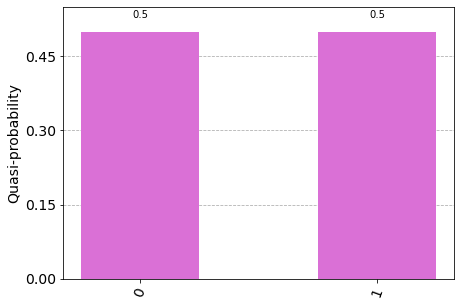

In [175]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results, color="Orchid")

The histogram shows an equal chance of measuring $|0\rangle$ or $|1\rangle$

To find the probability of measuring a state $|ψ\rangle$ in the state $|x\rangle$ the following formula can be used:
$p(|x\rangle) = | \langle x| ψ\rangle |^2$
<br>
$|x\rangle$ is the row vector. <br>
$| ψ\rangle$ is the column vector. <br>
converting between the bra-ket notation can be done using conjugate transpose.<br> <br>
Using the formula above, the probability of measuring $|x\rangle$ can be calculated by taking the inner product of $|x\rangle$ and the state we are measuring in, $| ψ\rangle$ and then squaring the magnitude.
<br><br>

### <font color='salmon' >Measuring the probability of $|0\rangle$ : </font>
<br>
$|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $ <br><br>
$\langle0  |q_0\rangle = \frac{1}{\sqrt2} \langle 0|0\rangle + \frac{i}{\sqrt2}\langle0 |1\rangle $ <br><br>
= $\frac{1}{\sqrt2} .1 + \frac{i}{\sqrt2}. 0 $ <br><br>
= $\frac{1}{\sqrt2}$ <br><br>
= $|\langle0 |q_0\rangle |^2 = \frac{1}{2} $ <br><br>
The probability is 0.5 or $\frac{1}{2}$

### <font color = "DarkViolet" >Initialisitng Qubit in state:</font>
$|q_0\rangle = \frac{i}{\sqrt2} |0\rangle + \frac{1}{\sqrt2}|1\rangle $

In [85]:
import qiskit
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.visualization as viz
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [86]:
sim = Aer.get_backend('aer_simulator')

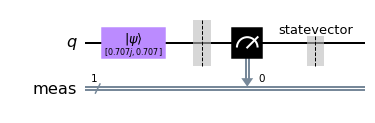

In [87]:
# Redefine qc
qc = qiskit.QuantumCircuit(1) 
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw(output='mpl')

In [88]:
# Simulate entire circuit.
# One amplitude is always 0.
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+1.j, 0.+0.j],
            dims=(2,))


### <font color="DeepPink"> Representing the state of a Qubit with the Bloch Sphere </font>

#### <font color="DeepPink"> state $|0\rangle$ : </font>

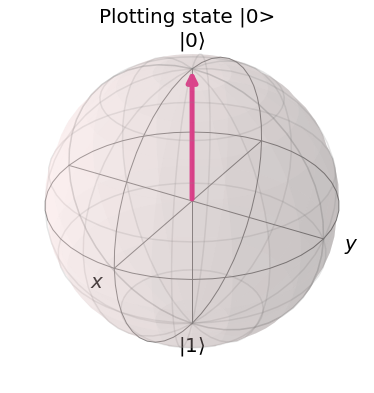

In [89]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1], title='Plotting state |0>')

***
# <font color="HotPink"> Qubit Gates </font>

## <font color="LightPink"> Pauli Gates </font>
### <font color="PaleVioletRed"> X-Gate </font>
The X-gate is represented by Pauli-X matrix:
$X =  
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $ = $|0\rangle \langle 1 | + |1\rangle \langle0|$

<br>
<b>Multiply the Qubit statevector by the X-gate:</b><br>
<font color='SlateBlue'><i> The X-gate switches the amplitude of the states $|0\rangle$ and $|1\rangle$</i> </font> <br>
$X|0\rangle =  
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} 
\begin{bmatrix} 1 \\ 0 \end{bmatrix} = 
\begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$


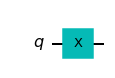

In [90]:
# Qiskit circuit to verify X-gate example above.
# X-gate on |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
#qc.measure(0,0)
qc.draw(output='mpl')

In [91]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

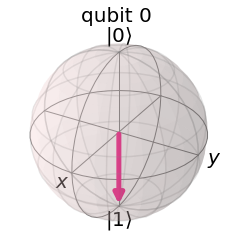

In [92]:
# Display result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

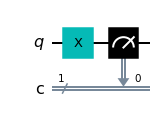

In [93]:
qc = qiskit.QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)

# Draw the circuit
qc.draw(output='mpl')

<font color='SlateBlue'><i> The state of the Qubit qc is $|1\rangle$</i> </font> <br>

### <font color="PaleVioletRed"> Y-gate </font>
As with the X-gate, the Pauli Y matrix acts as the Y-gate:
$Y =  
\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} $ <br>
<br>
$Y = -i|0\rangle \langle 1 | + i |1\rangle \langle0|$

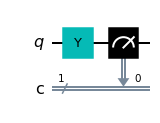

In [94]:
# Create a circuit.
qc = qiskit.QuantumCircuit(1, 1)

# Add a gate.
qc.y(0)

# Measure.
qc.measure(0, 0)

# Draw the circuit
qc.draw(output='mpl')

### <font color="PaleVioletRed"> Z-gate</font>
As with the X-gate, the Pauli Z matrix acts as the Z-gate:
$Z =  
\begin{bmatrix} 1 & 0 \\ 0 &-1 \end{bmatrix} $
<br>
<br>
$Z =|0\rangle \langle 0 | - |1\rangle \langle1|$

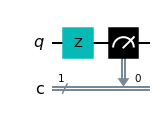

In [95]:
# Create a circuit.
qc = qiskit.QuantumCircuit(1, 1)

# Add a gate.
qc.z(0)

# Measure.
qc.measure(0, 0)

# Draw the circuit
qc.draw(output='mpl')

In [96]:
qc.y(0) # Y-gate on qubit 0
qc.z(0) # Z-gate on qubit 0
qc.draw()

┌───┐┌─┐┌───┐┌───┐
  q: ┤ Z ├┤M├┤ Y ├┤ Z ├
     └───┘└╥┘└───┘└───┘
c: 1/══════╩═══════════
           0

### <font color="PaleVioletRed"> H-gate (Hadamard Gate) </font>
The H-gate is a basic quantum gate.Using the H-gate means a superposition of $|0\rangle$ and $|1\rangle$ can be created.
<br>
Matrix of H-gate: <br>
$H = \frac{1}{\sqrt2} 
\begin{bmatrix} 1 & 1 \\ 1 &-1 \end{bmatrix} $
<br>
<br>
This matrix performs two tranformations:<br>
<font color="purple">
$H|0\rangle = |+\rangle$ <br> $H|1\rangle = |-\rangle$
    </font>
    <br>
    <br>
The H-gate looks like this on the bloch vector:
<br>
<i> it transforms the state of the Qubit between X and Z bases.<i>

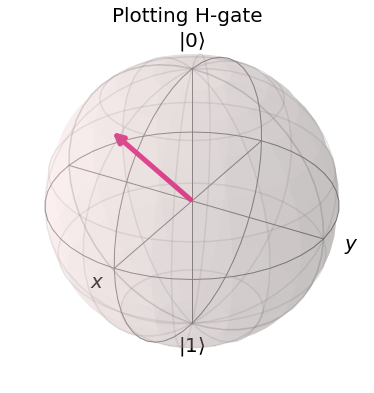

In [97]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,1], title='Plotting H-gate')

### <font color="PaleVioletRed"> T-Gate <font color="PaleVioletRed">
The T-gate is a P-gate with $ϕ=π/4:$ <br>
Matrix of T-gate: <br>
$T = 
\begin{bmatrix} 1 & 0 \\ 0 & e ^\frac{iπ}{4} \end{bmatrix} $
<br>
<br>
$T† = 
\begin{bmatrix} 1 & 0 \\ 0 & e ^{-\frac{iπ}{4}} \end{bmatrix} $

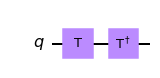

In [98]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw(output='mpl')

#### Exercise:
Re-run the above simulations with the qubit set initially to $|1\rangle$.

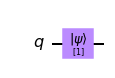

In [99]:
# X-gate
circuit = QuantumCircuit(1)
circuit.initialize(1)
circuit.draw(output='mpl')

In [100]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
 # Define initial_state as |1>
initial_state = [0,1]
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0)
# Tell simulator to save statevector
qc.save_statevector() 
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(qc) 
 # Do the simulation and return the result
result = sim.run(qobj).result()

In [101]:
out_state = result.get_statevector()
print(out_state) # output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


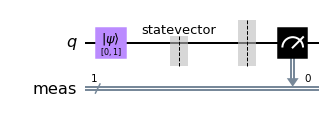

In [102]:
qc.measure_all()
qc.draw(output='mpl')

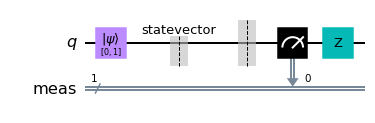

In [103]:
qc.z(0)
qc.draw(output='mpl')

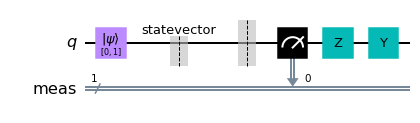

In [104]:
qc.y(0)
qc.draw(output='mpl')

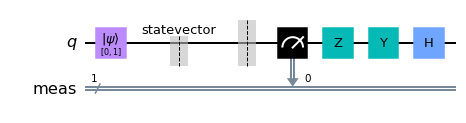

In [105]:
qc.h(0)
qc.draw(output='mpl')

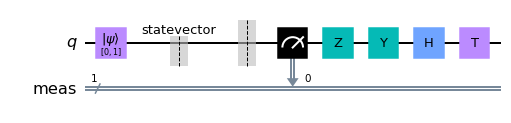

In [106]:
qc.t(0)
qc.draw(output='mpl')

In [107]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
 # Define initial_state as |0>
initial_state = [1,0]
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0)
# Tell simulator to save statevector
qc.save_statevector() 
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(qc) 
 # Do the simulation and return the result
result = sim.run(qobj).result()

In [108]:
out_state = result.get_statevector()
print(out_state) # output state vector

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


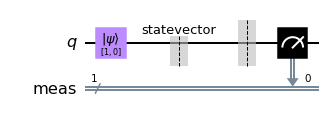

In [109]:
qc.measure_all()
qc.draw(output='mpl')

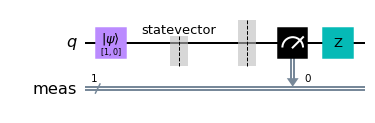

In [110]:
qc.z(0)
qc.draw(output='mpl')

***
## <font color="Coral">Quantum Gates</font>
### <font color="Coral"> NOT & CNOT </font>
***

In [184]:
import qiskit
# Qiskit Visualisation.
#import qiskit.visualization as viz
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [185]:
# Qiskit version.
qiskit.__qiskit_version__ 

{'qiskit-terra': '0.22.3', 'qiskit-aer': '0.11.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [186]:
# Creating a circuit with 8 Qubits & 8 outputs.
qc_output = QuantumCircuit(8)
qc_output.draw(initial_state=True)

q_0: |0>
        
q_1: |0>
        
q_2: |0>
        
q_3: |0>
        
q_4: |0>
        
q_5: |0>
        
q_6: |0>
        
q_7: |0>

In [187]:
# Adds a measurement to each qubit in the circuit qc_output.
qc_output.measure_all()

In [188]:
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

<font color= "orange" > <h6> Qubits are initialized to give an output of 0, like in the circuit above. <br>
The visual results plotted in a histogram are shown below. </font> </h6>

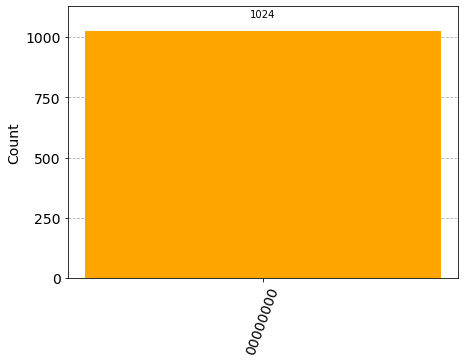

In [189]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts, color="orange")

### <font color="Coral"> NOT Gate </font>
A NOT gate flips the bit values so 0 = 1 and 1 = 0.
- x represents the operation that does NOT calculation.

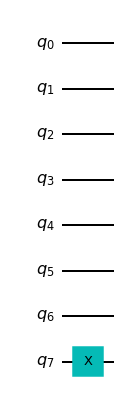

In [190]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw(output='mpl')

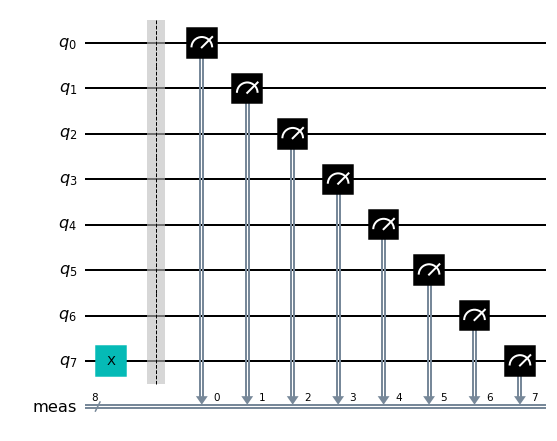

In [191]:
qc_encode.measure_all()
qc_encode.draw(output='mpl')

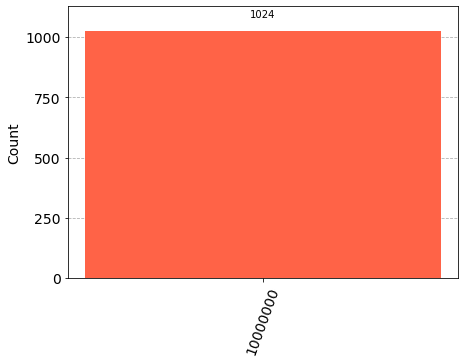

In [192]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts, color="tomato")

<font color="tomato"> <h6> Note how in the histogram above, the output is 10000000, instead of all 0s. </h6> </font>

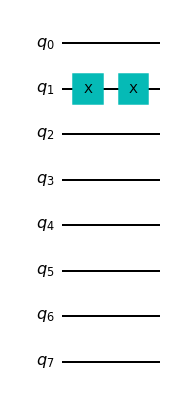

In [193]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(1)

qc_encode.draw(output='mpl')

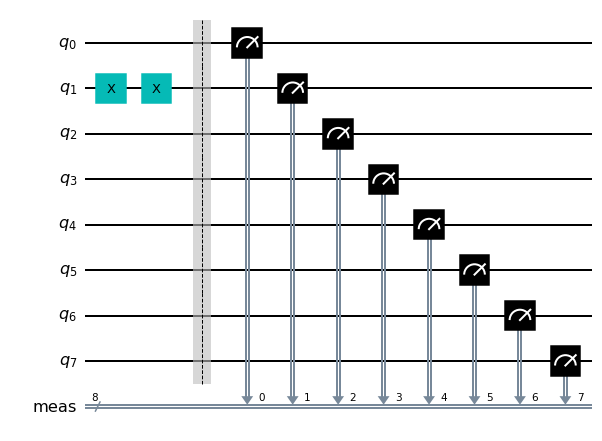

In [194]:
qc_encode.measure_all()
qc_encode.draw(output='mpl')

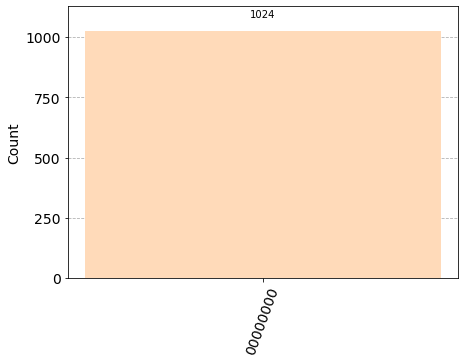

In [195]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts, color="PeachPuff")

### <font color="Coral"> CNOT Gate</font>
The CNOT gate behaves in the same way as a XOR gate. <br>It determines if two Qubits are different.

| Input1 | Input2 | XOR Output |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

<c>Possible CNOT inputs & the corresponding outputs.</c>

| Input(q1q0) | Output(q1q0) |
| --- | --- |
| 00 | 00 |
| 01 | 11 |
| 10 | 10 |
| 11 | 01 |

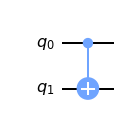

In [196]:
# Draw a CNOT gate;
# small black square is the control qubit.
# larger white sqaure is the target qubit.
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw(output='mpl')

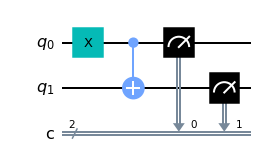

In [197]:
# Testing different CNOT inputs: (0,1) (1,0)
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

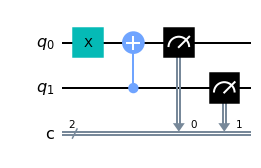

In [198]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(1,0)
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

<h6>The CNOT sees that qubit 0 is in state 1, and so applies a NOT to qubit 1. <br>This flips the 0 of qubit 1 into a 1, and so turns 01 into 11.</h6>

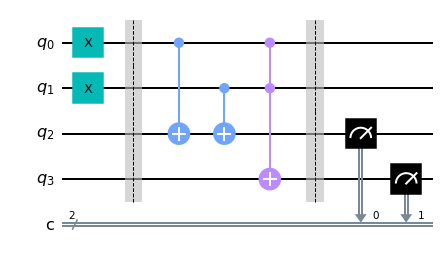

In [199]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) 
qc_ha.x(1) 
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')

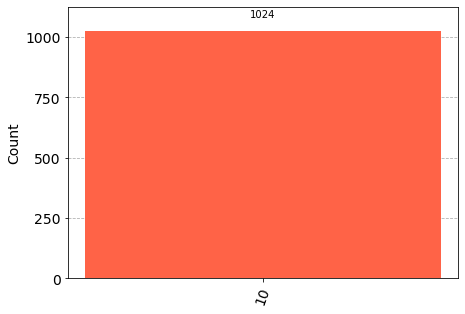

In [200]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts, color="tomato")

<h6>Result on histogram is 10. This means the computer can solve the 1 + 1 problem.</h6>

****
# <font color="LightGreen">Deutsch-Jozsa Problem</font>
The Deutsch-Jozsa Algorithm was proposed in 1992 by <font color="DarkGreen"><b> David Deutsch</b> </font> and <font color="DarkGreen"> <b>Richard Jozsa</b></font>. It is a deterministic quantum algorithm that has a better performance than the best classical algorithm. It was the first algorithm to separate quantum and classical difficulty of a problem. It highlights the significance of using quantum amplitudes that take positive and negative values, opposed to using classical probabilities that are always non-negative.

### <font color="DarkGreen" > The Problem Explained </font>
<br>
A Boolean function guarantees to be balanced or constant. <br>
- Constant functions return all 0's or all 1's. <br>
- Balanced functions return 0 for half of all inputs and 1 for the other half of inputs.
<br><br><br>
The Boolean function $f$ takes a String of bits as input and returns either $0$ or $1$.
<br>
<font color="YellowGreen"> $f({x_0,x_1,x_2,...}) -> $ 0 or 1, where $x_n$ is 0 or 1 </font>
<br><br>
Task: To determine whether the given Boolean function is balanced or constant.


## <font color="DarkGreen" > The Classical Solution </font>
<br>
<b>BEST CASE:</b>
Two queries to the oracle determine if the Boolean fuction $f(x)$ is balanced as two different outputs will be obtained: <br>
$f(0,0,0...) -> 0$ and $f(1,0,0,...) -> 1$ <br>
<br>
<b>WORST CASE:</b>
To conclude that $f(x)$ is constant, half + 1 of all possible inputs need to be checked, if the inputs continuously result in the same output.
<br>
The total number of inputs is $2^n$ so $2^{n-1} + 1$ inputs are checked to confirm that $f(x)$ is constant. <br>


## <font color="DarkGreen" > The Quantum Solution </font>
<br>
The problem can be solved with one call to the function $f(x)$ using a quantum computer. 
<br>
This works by implementing $f(x)$ as a quantum oracle that maps the state $|x\rangle|y\rangle$ to $|x\rangle |y⊕f(x)\rangle$, where ⊕ is addition modulo 2.


In [128]:
def f1(x):
    if x == 0:
        return 0
    else:
        return 0

In [129]:
def f2(x):
    if x == 0:
        return 0
    else:
        return 1

In [130]:
def f3(x):
    if x == 0:
        return 1
    else:
        return 0

In [131]:
def f4(x):
    if x == 0:
        return 1
    else:
        return 1

In [132]:
L = [f1, f2, f3, f4]

In [133]:
f = random.choice(L)

In [134]:
f(0)

1

In [135]:
f(1)

1

In [136]:
f

<function __main__.f4(x)>

In [137]:
list(itertools.product([0,1], repeat=3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [138]:
list(itertools.product([0,1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [139]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=2))
    L = random.choice(possible_Ls)
    def f(x):
        return L[x]
    return f

In [140]:
f = random_f()

In [141]:
f(0)

0

In [142]:
f(1)

0

## <font color="DarkGreen" > Stepping Through the Quantum Algorithm </font>
<br>
<font color="Olive"> 1. Two quantum registers are required; an n-qubit initialised to $|0\rangle$ and a 1-qubit initialised to $|1\rangle$. </font>
<br><br>

<font color="Olive"> 2. The Hadamard gate must then be applied to each qubit because for each $x$ , $f(x)$ is 0 or 1.
<br> </font>
$|ψ_1\rangle = \frac{1}{\sqrt2{^n+1}} \sum\limits_{x=0}^{2^{n-1}} |x\rangle (|0\rangle - |1\rangle)$
<br><br>

<font color="Olive">3. Apply the quantum oracle $|x\rangle|y\rangle$ to $|x\rangle |y⊕f(x)\rangle$
<br> </font>
$|ψ_2\rangle = \frac{1}{\sqrt2{^n+1}} \sum\limits_{x=0}^{2^{n-1}} |x\rangle (|f(x)\rangle - |1 ⊕ f(x)\rangle)$
<br><br>
$=\frac{1}{\sqrt2{^n+1}} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)} |x\rangle (|0\rangle - |1\rangle)$

<br>
<br>

<font color="Olive">4. Apply Hadamard gate to qubit in first register.<br>
Where $x . y =x_0y_0 ⊕ x_1y_1 ⊕ ... ⊕ x_{n-1}y_{n-1}$ is the sum of the bitwise product. <br></font>

$|ψ_3\rangle= \frac{1}{2{^n}} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)} \begin{bmatrix} \sum\limits_{x=0}^{2^{n-1}}(-1)^{x.y}|y\rangle \end{bmatrix}$
<br>
<br>

$\frac{1}{2{^n}} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)} \begin{bmatrix} \sum\limits_{y=0}^{2^{n-1}}(-1)^{f(x)}(-1)^{x.y}\end{bmatrix}|y\rangle $
<br><br>

<font color="Olive">5. The first register needs to be measured. <br> </font>
The probability of measuring $|0\rangle ^{⊕n} = |\frac{1}{2^n} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)}|^2$ evaluates to 1 if $f(x)$ is constant and 0 if $f(x)$ is balanced.

****
# <font color="cornflower"> Quantum Oracles </font>
<font color="CornflowerBlue"> 
    <b>Constant Function Oracles:</b><br>
    $f(x) = 0 $ : Apply I-Gate to Qubit in register  <br>
    $f(x) = 1$ : Apply X-Gate to Qubit in register 

- Can determine the circuit is balanced by applying a CNOT to each Qubit in register 1. The target is Qubit in register 2.
</font>


In [143]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

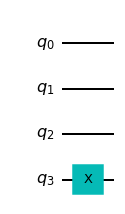

In [144]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw(output='mpl')

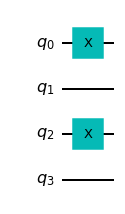

In [145]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw(output='mpl')

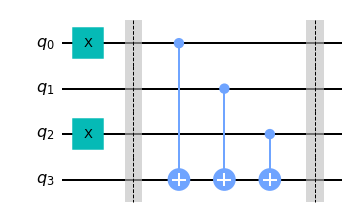

In [146]:
# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw(output='mpl')

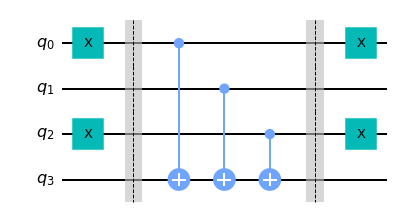

In [147]:
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw(output='mpl')

###  <font color="cornflower"> Solving Balanced Oracle with Deutsch Algorithm </font>

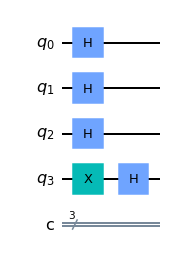

In [148]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw(output='mpl')

C:\Users\alexc\AppData\Local\Temp\ipykernel_34192\2958153205.py:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


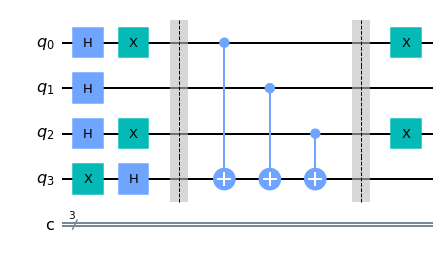

In [149]:
# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw(output='mpl')

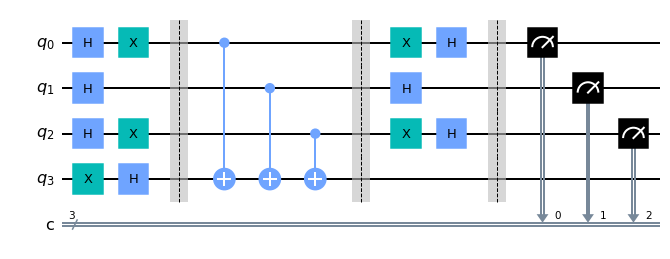

In [150]:
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw(output='mpl')

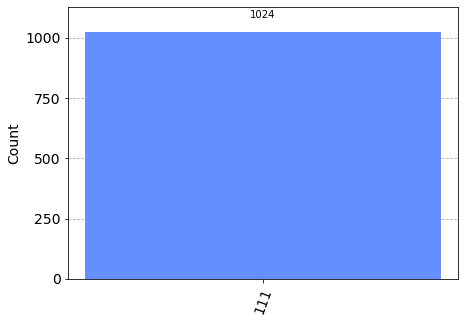

In [151]:
# Plot to histogram
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### <font color="cornflower"> Result: </font>
<br>
<font color="DeepSkyBlue"> The hisogram shows there is a 0% chance of measuring 000. Therefore the function is balanced & the algorithm correctly predicted this.</font>

### Testing algorithm with different output

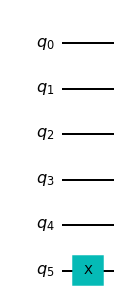

In [152]:
# set the length of the n-bit input string. 
n = 5

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw(output='mpl')

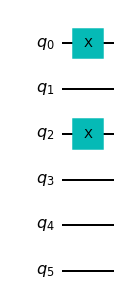

In [153]:
# Create balanced oracle.
balanced_oracle = QuantumCircuit(n+1)
# Choose controls to wrap.
b_str = "101"

# Place X-gates using string.
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw(output='mpl')

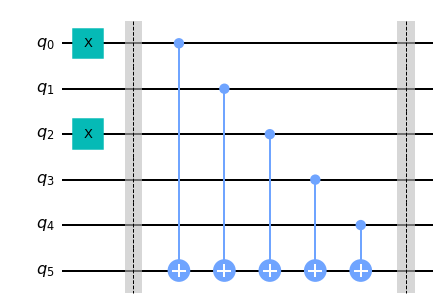

In [154]:
# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw(output='mpl')

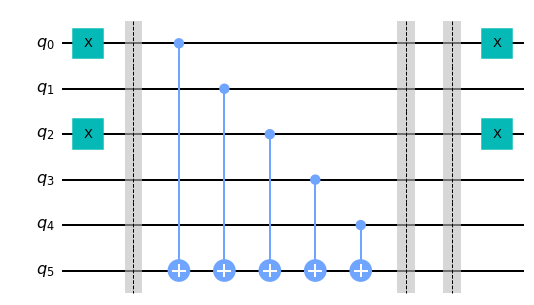

In [155]:
balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw(output='mpl')

C:\Users\alexc\AppData\Local\Temp\ipykernel_34192\1077879928.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


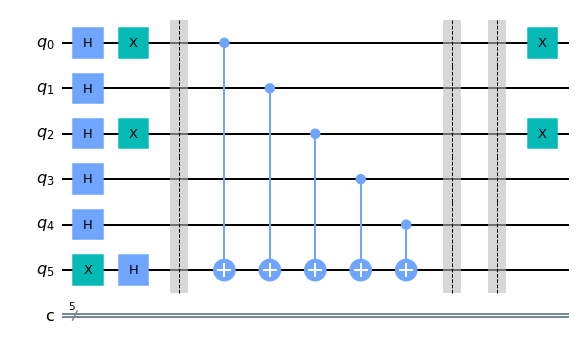

In [156]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw(output='mpl')

C:\Users\alexc\AppData\Local\Temp\ipykernel_34192\4079947310.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


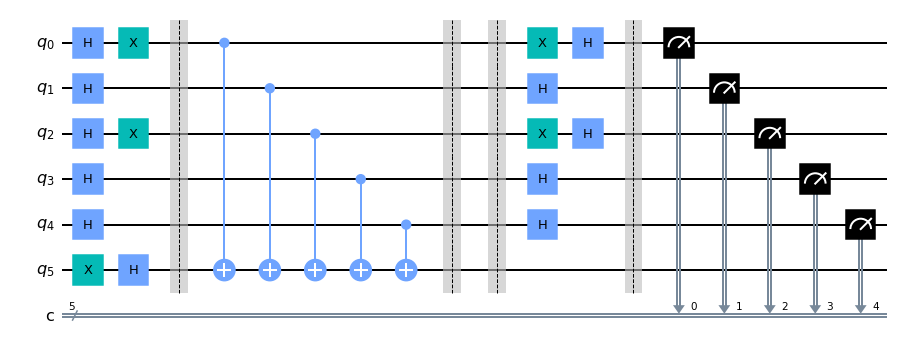

In [157]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw(output='mpl')

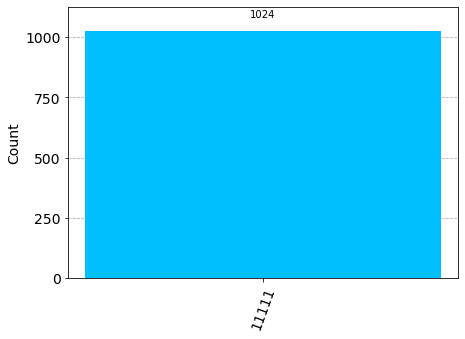

In [158]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer, color="DeepSkyBlue")

# References
[1] IBM Quantum. (n.d.). Deutsch-Jozsa algorithm. [online] Available at: https://quantum-computing.ibm.com/composer/docs/iqx/guide/deutsch-jozsa-algorithm.<br>

[2] Publications, M. (2019). All about Hadamard Gates. [online] Manning. Available at: https://freecontent.manning.com/all-about-hadamard-gates/ [Accessed 7 Jan. 2023].<br>

[3] qiskit.org. (n.d.). Qiskit. [online] Available at: https://qiskit.org/.<br>

[4] McLoughlin, I. (2022). Emerging Technologies 22/23. [online] GitHub. Available at: https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/05-quantum-computing.ipynb [Accessed 7 Jan. 2023]. <br>

[5] community.qiskit.org. (n.d.). Deutsch-Jozsa Algorithm. [online] Available at: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html.<br>

[6] David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558. doi:10.1098/rspa.1992.0167. <br>

[7] Shukla, A. (2020). Writing Math Equations in Jupyter Notebook: A Naive Introduction. [online] Medium. Available at: https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214.
<br>

[8] community.qiskit.org. (n.d.). Representing Qubit States. [online] Available at: https://qiskit.org/textbook/ch-states/representing-qubit-states.html.
<br>

[9] community.qiskit.org. (n.d.). Single Qubit Gates. [online] Available at: https://qiskit.org/textbook/ch-states/single-qubit-gates.html.


# <font color="PeachPuff">E</font><font color="Cyan">N</font><font color="Violet">D</font> 